# HW 4: Logistic Regression

## Importing libraries

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [0]:
# Load Iris dataset and find out what is in this dataset
iris = datasets.load_iris()
for key, value in iris.items():
    print(key)

data
target
target_names
DESCR
feature_names
filename


In [0]:
#what's in each of 
# target_names
# DESCR
# target
# feature_names
# data
# DESCR and target are shown below. 
# Continue to work out the rest by appending more cells below.

In [0]:
#Let's see the description of this dataset?
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [0]:
#What's in target?
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
iris['target_names'] ## The Iris data set consists of three types of flower names in the array column called 'target_names'.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
iris['feature_names'] # This gives the the specific features for the flowers

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
iris['data'] # This gives the sepal length (cm), sepal width (cm), petal length (cm) and petal width (cm) values in the dataset.

In [0]:
#How many 0s, 1s, and 2s are in target?

x = iris['target']
unique, counts = np.unique(x,return_counts = True)
print(np.asarray((unique,counts)).T)

[[ 0 50]
 [ 1 50]
 [ 2 50]]


The 0s are  50, 1s are 50 and 2s are 50.

## Using Logistic Regression for binary class classification

In [0]:
# Let's focus on data with only two classes ( the first 100 entries)
data_100 = iris.data[:100,:]
target_100 = iris.target[:100]

In [0]:
#check the size of data_100

data_100.shape # The dataset consists of 100 rows and 4 columns

(100, 4)

## Standardize Features

In [0]:
#What's the mean and standard deviation of data_100 and target_100
data_100

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
data_100.mean() #The mean was 3.05425

3.05425

In [0]:
data_100.std() # The Standard Deviation # 1.8745

1.8745617987945877

In [0]:
target_100.mean() # The Mean was 0.5


0.5

In [0]:
target_100.std() # The Std was 0.5

0.5

In [0]:
scaler = StandardScaler()
# Transform the feature
data_100_standardized = scaler.fit_transform(data_100)
data_100_standardized

array([[-5.81065904e-01,  8.41837140e-01, -1.01297765e+00,
        -1.04211089e+00],
       [-8.94308978e-01, -2.07835104e-01, -1.01297765e+00,
        -1.04211089e+00],
       [-1.20755205e+00,  2.12033793e-01, -1.08231219e+00,
        -1.04211089e+00],
       [-1.36417359e+00,  2.09934449e-03, -9.43643106e-01,
        -1.04211089e+00],
       [-7.37687441e-01,  1.05177159e+00, -1.01297765e+00,
        -1.04211089e+00],
       [-1.11201292e-01,  1.68157493e+00, -8.04974023e-01,
        -6.86441647e-01],
       [-1.36417359e+00,  6.31902691e-01, -1.01297765e+00,
        -8.64276271e-01],
       [-7.37687441e-01,  6.31902691e-01, -9.43643106e-01,
        -1.04211089e+00],
       [-1.67741667e+00, -4.17769553e-01, -1.01297765e+00,
        -1.04211089e+00],
       [-8.94308978e-01,  2.09934449e-03, -9.43643106e-01,
        -1.21994552e+00],
       [-1.11201292e-01,  1.26170604e+00, -9.43643106e-01,
        -1.04211089e+00],
       [-1.05093052e+00,  6.31902691e-01, -8.74308565e-01,
      

In [0]:
#what's the mean and standard deviation of the standardized data_100

data_100_standardized.mean() ## Mean was -1.1723955140041654e

#data_100_standardized.std() ##  Standard deviation was 0.9999


-1.1723955140041654e-15

## Create Logistic Regression

In [0]:
#Let's create a dataframe table to store all the features
features = pd.DataFrame(data_100_standardized, columns=iris.feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.581066,0.841837,-1.012978,-1.042111
1,-0.894309,-0.207835,-1.012978,-1.042111
2,-1.207552,0.212034,-1.082312,-1.042111
3,-1.364174,0.002099,-0.943643,-1.042111
4,-0.737687,1.051772,-1.012978,-1.042111


In [0]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
#Create another dataframe to store the target
target = pd.DataFrame(target_100, columns=['target'])
target

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [0]:
# let's combine these two 'tables' into one dataframe
df = pd.concat([features,target], axis=1)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.581066,0.841837,-1.012978,-1.042111,0
1,-0.894309,-0.207835,-1.012978,-1.042111,0


In [0]:
#find out which is most correlated to the target?
#df.info()
#df.corr().abs().target.sort_values(ascending=False)[1:]
df.corr().abs().target.sort_values(ascending = False)[1:]

## The petal length (cm) and petal width (cm) are most correlated variable to the target variable.

target               1.000000
petal length (cm)    0.969990
petal width (cm)     0.960307
sepal length (cm)    0.728290
sepal width (cm)     0.690684
Name: target, dtype: float64

In [0]:
# Create logistic regression object
LogReg = LogisticRegression()

## Train Logistic Regression

In [0]:
#Create (X,y) data pair ready for fitting the model
X = df[iris.feature_names]
y=df['target']

In [0]:
# Train model using the entire dataset
LogReg.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Add a column predictions to the df datagrame on the predicted values based on X
df['predictions'] = LogReg.predict(X)
pred = df['predictions']
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predictions
0,-0.581066,0.841837,-1.012978,-1.042111,0,0
1,-0.894309,-0.207835,-1.012978,-1.042111,0,0
2,-1.207552,0.212034,-1.082312,-1.042111,0,0
3,-1.364174,0.002099,-0.943643,-1.042111,0,0
4,-0.737687,1.051772,-1.012978,-1.042111,0,0


In [0]:
#What's the score of using the entire dataset to train our Logistic Regression?
LogReg.score(X,y) # The score was 1.0

1.0

In [0]:
# probability of each class as validated against X
#LogReg.predict_proba(X)[0:10]


df['predictions_probability_0'] = LogReg.predict_proba(X)[:, 0]
df['predictions_probability_1'] = LogReg.predict_proba(X)[:, 1]
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predictions,predictions_probability_0,predictions_probability_1
26,-0.737687,0.631903,-0.874309,-0.686442,0,0,0.974028,0.025972
86,1.924879,0.002099,1.275062,1.269739,1,1,0.003848,0.996152
81,0.045420,-1.467442,0.581717,0.380566,1,1,0.034668,0.965332
91,0.985149,-0.207835,1.205728,1.091905,1,1,0.009367,0.990633
69,0.202042,-1.257507,0.720386,0.558401,1,1,0.024289,0.975711
70,0.671906,0.212034,1.344397,1.803243,1,1,0.005366,0.994634
1,-0.894309,-0.207835,-1.012978,-1.042111,0,0,0.971477,0.028523
80,0.045420,-1.467442,0.651051,0.558401,1,1,0.023986,0.976014
96,0.358663,-0.417770,0.928390,0.914070,1,1,0.024067,0.975933
29,-1.207552,0.212034,-0.874309,-1.042111,0,0,0.983067,0.016933


In [0]:
#probability of each class validated against X
LogReg.predict_proba(X)

array([[9.89030983e-01, 1.09690167e-02],
       [9.71476553e-01, 2.85234466e-02],
       [9.87612030e-01, 1.23879698e-02],
       [9.82851619e-01, 1.71483812e-02],
       [9.92415445e-01, 7.58455550e-03],
       [9.85775233e-01, 1.42247668e-02],
       [9.90215071e-01, 9.78492871e-03],
       [9.86310757e-01, 1.36892430e-02],
       [9.80490169e-01, 1.95098306e-02],
       [9.80950103e-01, 1.90498972e-02],
       [9.89079877e-01, 1.09201227e-02],
       [9.88172711e-01, 1.18272886e-02],
       [9.80708481e-01, 1.92915188e-02],
       [9.92462406e-01, 7.53759411e-03],
       [9.93644975e-01, 6.35502480e-03],
       [9.95016071e-01, 4.98392867e-03],
       [9.90634595e-01, 9.36540503e-03],
       [9.85628542e-01, 1.43714579e-02],
       [9.79883156e-01, 2.01168438e-02],
       [9.92299470e-01, 7.70052995e-03],
       [9.72302046e-01, 2.76979540e-02],
       [9.87126748e-01, 1.28732522e-02],
       [9.96995157e-01, 3.00484276e-03],
       [9.46480171e-01, 5.35198291e-02],
       [9.838298

Text(0, 0.5, 'target')

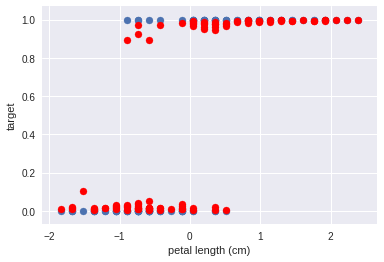

In [0]:
# Plot the paredicted probabilities of petal length (cm) against predictions                          

df.rename(columns = {'petal length (cm)': 'petal_length'},inplace = True) # Rename the column                        
plt.scatter(df.petal_length, df.target)                                                      

plt.scatter(df.petal_length,df.predictions_probability_1 , color='red')             

#plt.plot(df.petal_length,pred, color='red')                 
plt.xlabel('petal length (cm)')                
plt.ylabel('target')                                                            

Text(0, 0.5, 'target')

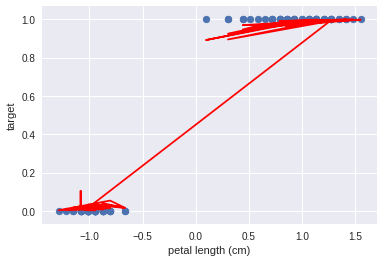

In [0]:
# Plot the paredicted probabilities of petal length (cm) against predictions                          

df.rename(columns = {'petal length (cm)': 'petal_length'},inplace = True) # Rename the column                        
plt.scatter(df.petal_length, df.target)                                                      

#plt.scatter(df.petal_length,df.predictions_prob_1 , color='red')             

plt.plot(df.petal_length,df.predictions_probability_1, color='red')                 
plt.xlabel('petal length (cm)')                
plt.ylabel('target')

##  Multi-class classification using Logistic Regression

In [0]:
#Load Iris dataset again
iris = datasets.load_iris()

In [0]:
#Standardize the dataset
scaler2 = StandardScaler()

# Transform the feature
standardized_data = scaler2.fit_transform(iris.data)

In [0]:
#create dataframes for data and target separately
data = pd.DataFrame(standardized_data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['target'])

In [0]:
#Combine data and target into one big dataframe tables

multi_data = pd.concat([data,target],axis = 1)
#df = pd.concat([features,target], axis=1)

In [0]:
#check how many different values does target have?
multi_data['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [0]:
#Create a new copy of Logistic Regression class
#LogRegM = LogisticRegression()

LogRegM = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')


In [0]:
#Define (X,y) to be used for training the model
X=multi_data[iris.feature_names]
y=multi_data['target']

In [0]:
#Fit the model with all the data
#Find out how well it scores

ss = LogRegM.fit(X,y)
ss.score(X,y)

0.9733333333333334

In [0]:
#Show which ones (rows) the model fail to predict 

multi_data['predictions'] = LogRegM.predict(X)

#multi_data.loc[:,['target','predictions']]

multi_data.loc[~(multi_data['target'] == multi_data['predictions'])] ## Gives the rows which the model fail to predict

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predictions
70,0.068662,0.328414,0.592246,0.790671,1,2
77,1.038005,-0.131979,0.705921,0.659038,1,2
83,0.189830,-0.822570,0.762758,0.527406,1,2
133,0.553333,-0.592373,0.762758,0.395774,2,1


In [0]:
#multi_data['predictions'].value_counts()

In [0]:
#Show the predict_proba of those (rows) that failed to predict correctly.
#Is the probability of the target class close/not close to that of the predicted class in these cases?
for i in range(0,len(multi_data)):
  if (multi_data['target'][i] != multi_data['predictions'][i]):
    print(LogRegM.predict_proba(X)[i])
    
    
# Note: Here, the probabilities for target predict class was bit close to actual target class.
#  If we observe the actual target for the first row in the above dataframe was 1 it has probability of 0.4403, but model had predicted as 2 which has probability of 0.5476. 
# So, if we see the both values Here, the probabilities seems close but predictions were different.

[0.01201214 0.44032623 0.54766162]
[0.00117927 0.45787004 0.54095069]
[0.00167859 0.43725132 0.56107009]
[0.00198042 0.58401019 0.41400939]
